In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd

In [9]:
X1 = sps.chi2.rvs(size = 100, df = 2)
X2 = sps.norm.rvs(size = 150, loc = 3, scale = 1)
X3 = sps.uniform.rvs(size = 200,loc = -2, scale = 4)
X4 = sps.norm.rvs(size = 100, loc = 5, scale = 1)
pooled = np.concatenate([X1, X2, X3, X4])
data = pd.DataFrame({"Выборочное среднее" : [X1.mean(), X2.mean(), X3.mean(), X4.mean(), pooled.mean()],
              "Выборочная оценка дисперсии" : [X1.var(), X2.var(), X3.var(),X4.var(), pooled.var()],
              "Выборочная оценка с.к.о" : [X1.std(), X2.std(), X3.std(), X4.std(), pooled.std()],
             },index = ['X1','X2','X3','X4','pooled'])
data

,Выборочное среднее,Выборочная оценка дисперсии,Выборочная оценка с.к.о
X1,1.808529,3.754794,1.937729
X2,2.861217,1.122402,1.059435
X3,-0.011128,1.460941,1.208694
X4,5.051365,1.015353,1.007647
pooled,2.023539,5.076706,2.253155


C:\1\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


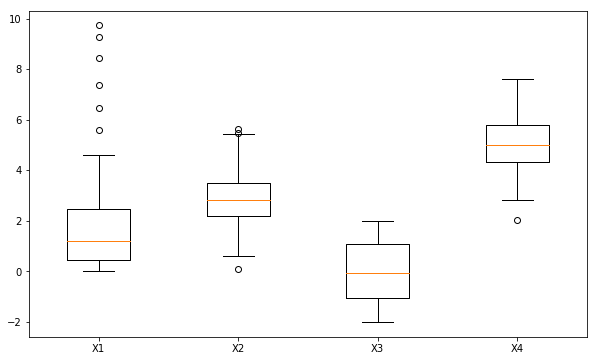

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize= (10, 6))

ax.boxplot([X1, X2, X3, X4], labels=['X1', 'X2', 'X3', 'X4'])

plt.show()


In [11]:
sps.bartlett(X1, X2, X3, X4)

BartlettResult(statistic=65.86776866631709, pvalue=3.2713103770590417e-14)

In [24]:
D_vnutr = (X1.var() * len(X1) + X2.var() * len(X2) + X3.var() * len(X3) + X4.var() * len(X4)) \
    / (len(X1) + len(X2) + len(X3) + len(X4))
D_vnutr


1.7046604112462493

In [26]:
D_mezh=len(X1) * (X1.mean() - pooled.mean()) ** 2 + len(X2) * (X2.mean() - pooled.mean()) ** 2 + \
    len(X3) * (X3.mean()-pooled.mean()) ** 2 + len(X4) * (X4.mean() - pooled.mean()) ** 2
D_mezh /= len(X1) + len(X2) + len(X3) + len(X4)
D_mezh

3.3720457284906544

In [27]:
sps.f_oneway(X1, X2, X3, X4)

F_onewayResult(statistic=360.0202823602996, pvalue=6.250791705930936e-129)

In [28]:
import statsmodels.stats.multicomp as mc

In [29]:
r = mc.pairwise_tukeyhsd(pooled, ['x1'] * 100 + ['x2'] * 150 + ['x3'] * 200 + ['x4'] * 100)
r.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
x1,x2,1.0527,0.001,0.6167,1.4886,True
x1,x3,-1.8197,0.001,-2.2332,-1.4061,True
x1,x4,3.2428,0.001,2.7653,3.7204,True
x2,x3,-2.8723,0.001,-3.2371,-2.5076,True
x2,x4,2.1901,0.001,1.7542,2.6261,True
x3,x4,5.0625,0.001,4.6489,5.4761,True


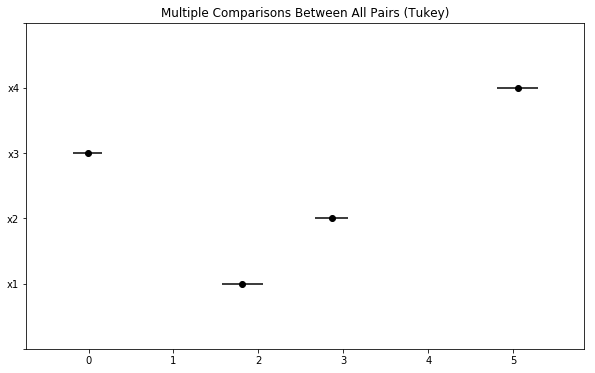

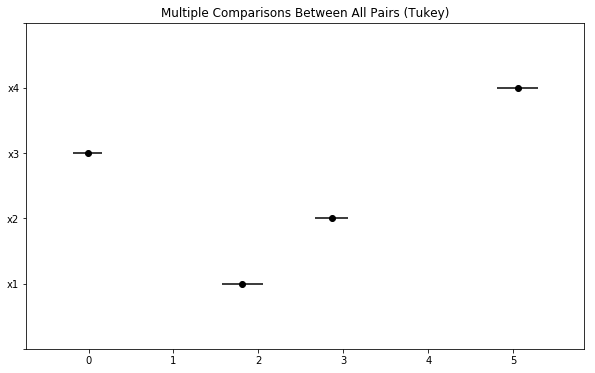

In [30]:
r.plot_simultaneous(figsize = (10, 6))
